In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
customer_df = pd.read_csv('customers.csv', index_col ='CustomerID')
customer_df.head()

Genre  Age  Annual_Income_(k$)  Spending_Score
CustomerID                                                 
1             Male   19                  15              39
2             Male   21                  15              81
3           Female   20                  16               6
4           Female   23                  16              77
5           Female   31                  17              40

In [4]:
# Personal Practice 1
sns.countplot(x = customer_df['Age'], hue = 'Genre', data = customer_df)
plt.show()

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
# Personal Practice 2
print(customer_df['Genre'].value_counts().values)

[112  88]


In [7]:
customer_df.describe()

Age  Annual_Income_(k$)  Spending_Score
count  200.000000          200.000000      200.000000
mean    38.850000           60.560000       50.200000
std     13.969007           26.264721       25.823522
min     18.000000           15.000000        1.000000
25%     28.750000           41.500000       34.750000
50%     36.000000           61.500000       50.000000
75%     49.000000           78.000000       73.000000
max     70.000000          137.000000       99.000000

In [8]:
# Personal Practice 3
sns.scatterplot(x = 'Age', y = 'Spending_Score', hue = 'Genre', data = customer_df)
plt.show()

In [9]:
customer_df.drop_duplicates(inplace=True)

In [10]:
# Personal Practice 4

print(customer_df.duplicated())

CustomerID
1      False
2      False
3      False
4      False
5      False
       ...  
196    False
197    False
198    False
199    False
200    False
Length: 200, dtype: bool


In [11]:
X = customer_df.iloc[:, [2, 3]].values

In [12]:
# Personal Practice 5
X_1 = customer_df.iloc[:, [1, 2]].values

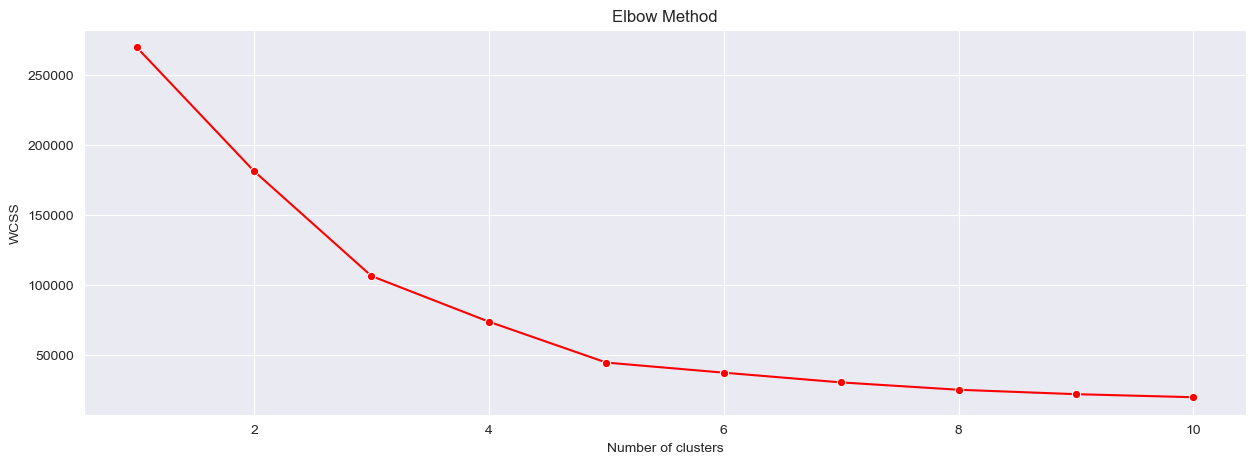

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Personal Practice 6
wcss1 = []
for i in range(1, 11):
    kmeans1 = KMeans(n_clusters = i, random_state = 24)
    kmeans1.fit(X_1)
    wcss1.append(kmeans1.inertia_)

sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='blue')
plt.title('Elbow Method 1')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS1')
plt.show()

In [15]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X)

In [16]:
# Personal Practice 7
kmeans1 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 34)
y_pred1 = kmeans1.fit_predict(X_1)

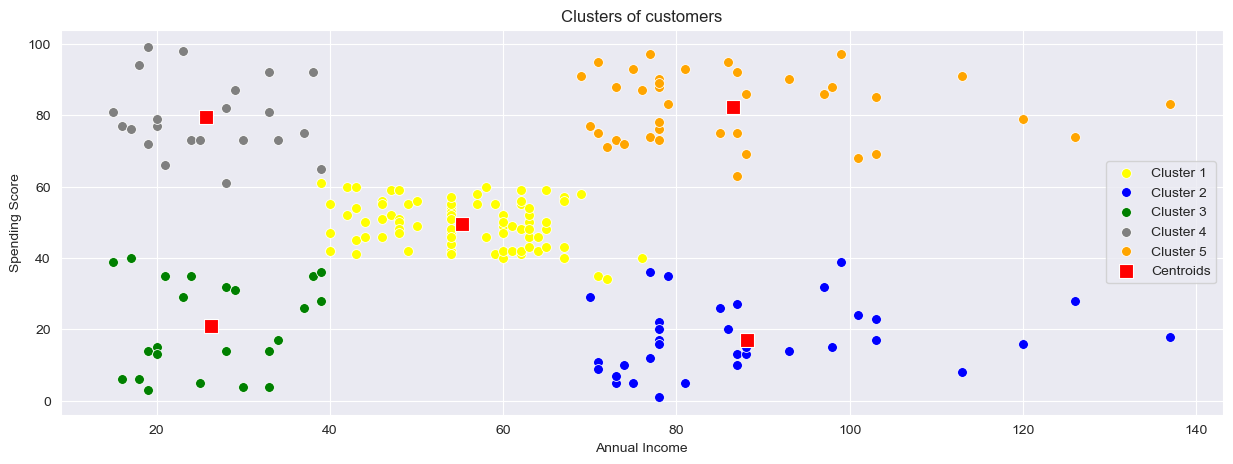

In [17]:
sns.scatterplot(x=X[y_pred == 0, 0], y=X[y_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_pred == 1, 0], y=X[y_pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_pred == 2, 0], y=X[y_pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X[y_pred == 3, 0], y=X[y_pred == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X[y_pred == 4, 0], y=X[y_pred == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=100,marker=',')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [18]:
# Personal Practice 8
sns.scatterplot(x=X[y_pred1 == 0, 0], y=X_1[y_pred1 == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_pred1 == 1, 0], y=X_1[y_pred1 == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_pred1 == 2, 0], y=X_1[y_pred1 == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X[y_pred1 == 3, 0], y=X_1[y_pred1 == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X[y_pred1 == 4, 0], y=X_1[y_pred1 == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans1.cluster_centers_[:, 0], y=kmeans1.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=100,marker=',')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()